<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Import the required libraries


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
# !pip install pandas numpy seaborn matplotlib scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

## Importing the Dataset


Firstly, loading dataset into a dataframe and displaying first 5 rows.

In [ ]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Main idea of this project is implementing a regression analysis on the video game sales dataset to gain information about the factors those affecting global sales of a video game. The most affecting and important features will be decided by checking all features like platform, release year, genre, publisher, NA sales, EU sales, JP sales, other locational sales. As a result of this analysis, we will find out ways to maximize our global sales.


# 1. About the Data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Here we can see the general informations of variables. Our data set has attributes rank, name, platform, release year, genre, publisher, and number of sales across North America, Europe, Japan, and other regions. Our analysis aims to extract relationships between these variables and global sales. Through regression modeling, we seek to identify key factors of video game sales performance and acting with respect to that to get best outcome.

- Detailed information about features:
- Rank: Ranking of overall sales
- Name: Name of the game
- Platform: Platforms where the game is published
- Genre: Genre of the game
- Publisher: Publisher of the game
- NA_Sales: Sales in North America (in millions)
- EU_Sales: Sales in Europe (in millions)
- JP_Sales: Sales in Japan (in millions)
- Other_Sales: Sales in the rest of the world (in millions)
- Global_Sales: Total worldwide sales

From the info function above we can see that there are some datas they contain null values and those are 'Year', and 'Publisher'. We need to get rid of them to not encounter any issue. Now let's check how many null values they have.

In [ ]:
data[['Year', 'Publisher']].isnull().sum()

Year         271
Publisher     58
dtype: int64

To get rid of null values, and check them again:

In [ ]:
data.dropna(subset=['Year', 'Publisher'], inplace=True)
data[['Year', 'Publisher']].isnull().sum()

Year         0
Publisher    0
dtype: int64

To achieve some important informations about our target variable we can draw a histogram and a heatmap.

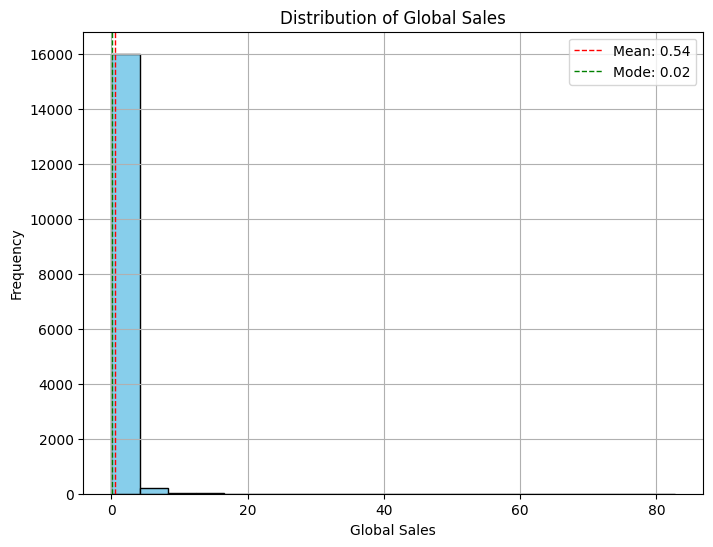

In [ ]:
# Calculate mean and mode of the target variable (Global_Sales)
mean_sales = data['Global_Sales'].mean()
mode_sales = data['Global_Sales'].mode()[0]

# Plot a histogram of the target variable (Global_Sales)
plt.figure(figsize=(8, 6))
plt.hist(data['Global_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_sales, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_sales:.2f}')
plt.axvline(mode_sales, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_sales:.2f}')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


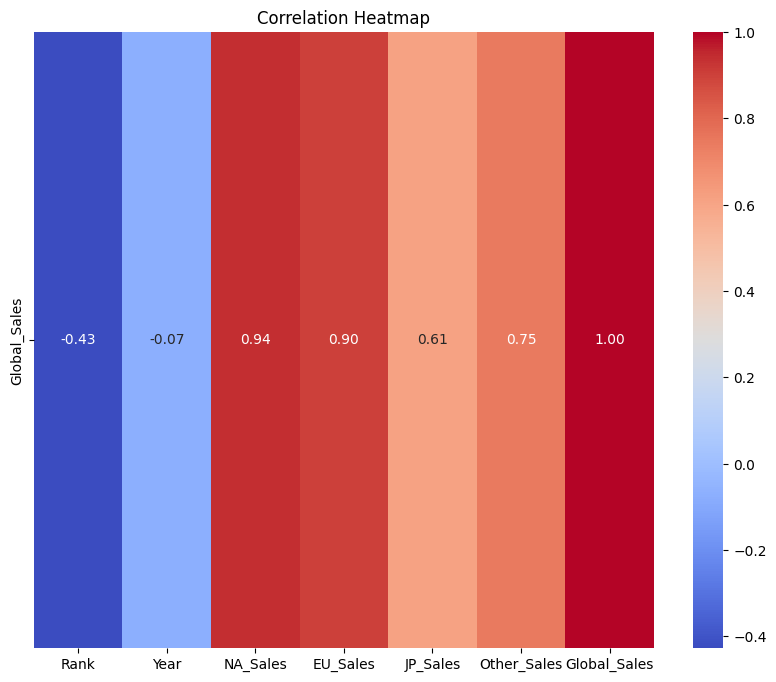

In [ ]:
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr.iloc[[-1], :], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

To see how NA sales affects global sales lets draw a graph.

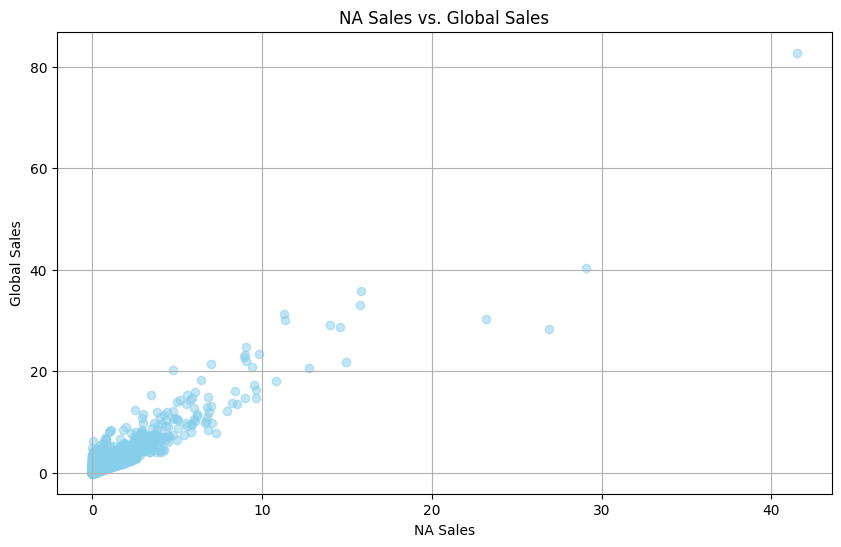

In [ ]:
# Plot a scatter plot of NA Sales vs. Global Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['NA_Sales'], data['Global_Sales'], color='skyblue', alpha=0.5)
plt.title('NA Sales vs. Global Sales')
plt.xlabel('NA Sales')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()

From the correlation heatmap and NA sales vs global sales graph which are provided above, we can see that our target variable global sales is mostly affected by NA sales, EU sales, and other regional sales with the given order. Also, we can realize unneccessary features and drop them.

In [ ]:
# New dataframe created with a feature and target variable.
data_2 = pd.DataFrame()
lst = ['NA_Sales','Global_Sales']
for i in lst:
    data_2[i] = data[i]
data_2.head()

,NA_Sales,Global_Sales
0,41.49,82.74
1,29.08,40.24
2,15.85,35.82
3,15.75,33.00
4,11.27,31.37


In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('Global_Sales', axis=1)
y = data['Global_Sales']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 13032
Test set size: 3259


# 2. Objectives


We will use 3 different regression models to predict our target variable. As a result of using 3 different regression models, we will calculate MSE and R^2 values and finally with those values it will be clear which regression model is best for our analysis between those 3 models.

1.  Simple Linear Regression Model: Implement a simple linear regression model as a baseline to establish a starting point for performance evaluation. This model will predict Global_Sales solely based on NA_Sales.

2.  Polynomial Regression Model: Explore the possibility of capturing non-linear relationships by adding polynomial effects to the baseline model. This involves introducing higher-order terms of NA_Sales to the regression model.

3.  Regularization Regression Model: Some regularization techniques such as Ridge regression to get rid of overfitting and improve generalization performance.

# 3. Linear Regression Models


1.  Simple Linear Regression Model:
-   We initialize the baseline model and fit it to the training data, using only the NA_Sales feature as input (X_train[['NA_Sales']]).
-   We make predictions on the test set using the trained model (y_pred_baseline).
-   We evaluate the performance of the baseline model using mean squared error (mean_squared_error) and R-squared score (r2_score).
-   We plot our model predictions and actual values.

In [ ]:

# Initialize and fit the baseline linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train[['NA_Sales']], y_train)

# Predict on the test set
y_pred_baseline = baseline_model.predict(X_test[['NA_Sales']])

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print("Baseline Model:")
print("Mean Squared Error:", baseline_mse)
print("R-squared Score:", baseline_r2)


Baseline Model:
Mean Squared Error: 0.3384393166922972
R-squared Score: 0.9208878288847482


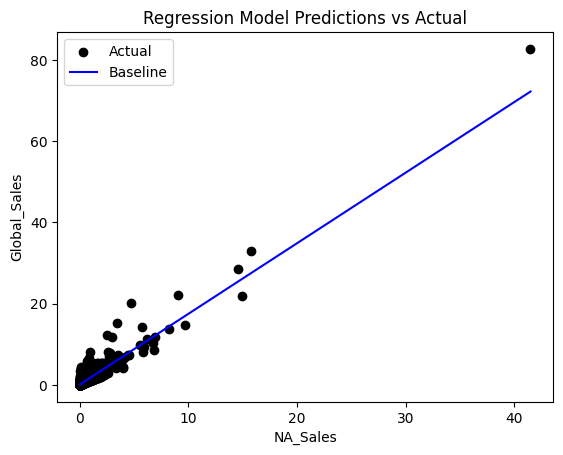

In [ ]:
# Sort the test set by 'NA_Sales' for plotting
sorted_indices = X_test['NA_Sales'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Plot the actual 'Global_Sales'
plt.scatter(X_test_sorted['NA_Sales'], y_test_sorted, color='black', label='Actual')

# Plot the baseline model predictions
plt.plot(X_test_sorted['NA_Sales'], y_pred_baseline[sorted_indices], color='blue', label='Baseline')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.title('Regression Model Predictions vs Actual')
plt.legend()
plt.show()

2.  Polynomial Regression Model:
-   We create polynomial features of the specified degree (degree) using PolynomialFeatures.
-   We fit a linear regression model to the polynomial features.
-   We make predictions on the test set using the trained polynomial regression model.
-   We evaluate the performance of the polynomial regression model using mean squared error and R-squared score.
-   We plot our model predictions and actual values.

In [ ]:
# Create polynomial features
degree = 2  # or choose another degree for polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly_train = poly_features.fit_transform(X_train[['NA_Sales']])
X_poly_test = poly_features.transform(X_test[['NA_Sales']])

# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate the polynomial regression model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Model (Degree={}):".format(degree))
print("Mean Squared Error:", poly_mse)
print("R-squared Score:", poly_r2)


Polynomial Regression Model (Degree=2):
Mean Squared Error: 0.765223331501056
R-squared Score: 0.8211245675154961


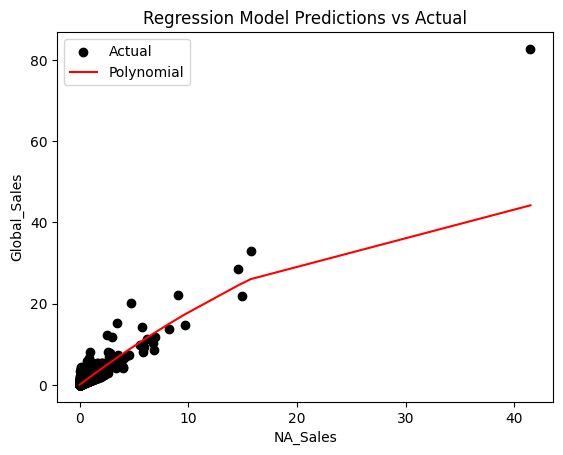

In [ ]:
# Sort the test set by 'NA_Sales' for plotting
sorted_indices = X_test['NA_Sales'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Plot the actual 'Global_Sales'
plt.scatter(X_test_sorted['NA_Sales'], y_test_sorted, color='black', label='Actual')

# Plot the polynomial model predictions
plt.plot(X_test_sorted['NA_Sales'], y_pred_poly[sorted_indices], color='red', label='Polynomial')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.title('Regression Model Predictions vs Actual')
plt.legend()
plt.show()

3.  Regularization Regression Model (Ridge Regression):
-   We initialize and fit the Ridge regression model with cross-validation (cv=5 indicates 5-fold cross-validation).
-   We make predictions on the test set using the trained Ridge regression model.
-   We evaluate the performance of the Ridge regression model using mean squared error and R-squared score.
-   We plot our model predictions and actual values.

In [ ]:
from sklearn.linear_model import RidgeCV

# Fit Ridge regression model
ridge_model = RidgeCV(cv=5)  # Cross-validation with 5 folds
ridge_model.fit(X_train[['NA_Sales']], y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test[['NA_Sales']])

# Evaluate the Ridge regression model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Model:")
print("Mean Squared Error:", ridge_mse)
print("R-squared Score:", ridge_r2)



Ridge Regression Model:
Mean Squared Error: 0.3393127314743872
R-squared Score: 0.920683663067459


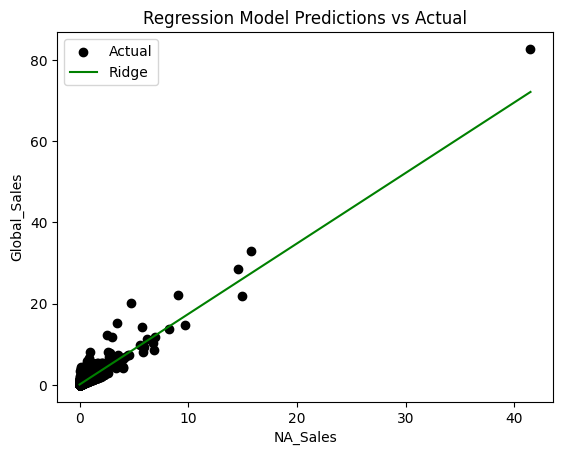

In [ ]:
# Sort the test set by 'NA_Sales' for plotting
sorted_indices = X_test['NA_Sales'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Plot the actual 'Global_Sales'
plt.scatter(X_test_sorted['NA_Sales'], y_test_sorted, color='black', label='Actual')


# Plot the Ridge model predictions
plt.plot(X_test_sorted['NA_Sales'], y_pred_ridge[sorted_indices], color='green', label='Ridge')

plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.title('Regression Model Predictions vs Actual')
plt.legend()
plt.show()

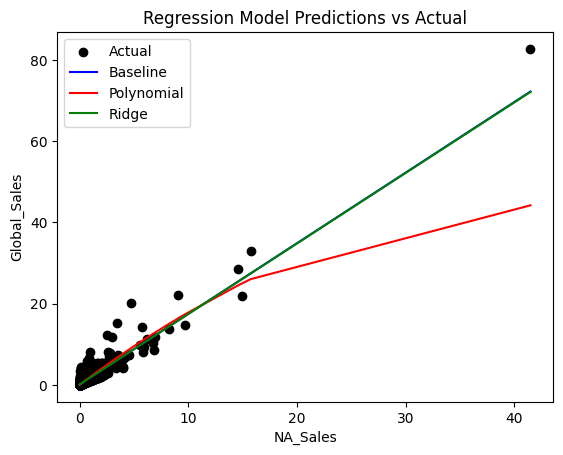

In [ ]:
# Sort the test set by 'NA_Sales' for plotting
sorted_indices = X_test['NA_Sales'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Plot the actual 'Global_Sales'
plt.scatter(X_test_sorted['NA_Sales'], y_test_sorted, color='black', label='Actual')

# Plot the baseline model predictions
plt.plot(X_test_sorted['NA_Sales'], y_pred_baseline[sorted_indices], color='blue', label='Baseline')

# Plot the polynomial model predictions
plt.plot(X_test_sorted['NA_Sales'], y_pred_poly[sorted_indices], color='red', label='Polynomial')

# Plot the Ridge model predictions
plt.plot(X_test_sorted['NA_Sales'], y_pred_ridge[sorted_indices], color='green', label='Ridge')

plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.title('Regression Model Predictions vs Actual')
plt.legend()
plt.show()

# 4. Insights and key findings


In [ ]:
# Create a dictionary with model names and corresponding metrics
model_metrics = {
    "Model": ["Linear Regression Model", "Polynomial Regression (Degree={})".format(degree), "Ridge Regression"],
    "Mean Squared Error (MSE)": [baseline_mse, poly_mse, ridge_mse],
    "R-squared (R^2)": [baseline_r2, poly_r2, ridge_r2]
}

# Create a DataFrame
df = pd.DataFrame(model_metrics)

# Print the DataFrame
print(df)

                              Model  Mean Squared Error (MSE)  R-squared (R^2)
0           Linear Regression Model                  0.338439         0.920888
1  Polynomial Regression (Degree=2)                  0.765223         0.821125
2                  Ridge Regression                  0.339313         0.920684


Firstly, the Linear Regression Model demonstrates strong predictive capability with a relatively low Mean Squared Error of 0.338 and a high R-squared (R^2) value of 0.921. This suggests that linear relationships capture the association between the selected feature and global sales. Secondly, implementing Polynomial Regression with a degree of 2 slightly increases the MSE to 0.765 while decreasing the R^2 to 0.821, indicating a change between model complexity and predictive accuracy. However, it's important that Polynomial Regression discovers potential non linear relationships that might be missed by simple linear regression models. Lastly, the Ridge Regression model, equipped with regularization techniques, maintains a comparable performance to the Linear Regression model with an MSE of 0.339 and an R^2 of 0.921, effectively controlling for overfitting. Overall, while each model presents distinct advantages and trade-offs, their collective insights show how NA sales affecting global sales in the video game industry.

# 5. Next Steps



While the current regression analysis provides valuable informations into a factor influencing global video game sales, it's crucial to acknowledge potential issues of the models and outline a plan of action for further improvements. One potential limitation is the assumption of linearity in the relationships between features and sales figures, which may not fully represent effect of the our feature to video game market. To address this, future models of the analysis could explore different modeling techniques, such as decision trees, etc. to capture non-linear relationships more effectively. Additionally, working with other features from our data set or getting different effective features, such as user reviews could provide a more total understanding of the factors effecting sales performance. Furthermore, iteratively working on the analysis and modeling techniques, stakeholders can gain deeper ideas into the dynamics of the video game market and make more informed decisions to optimize sales strategies and maximize profitability.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
